# Image color summary using KMeans

Author: David Zhao

Last edited: 2017-11-22

### 1. Import modules

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

### 2. Load image
#### 2.1 Extract image properties

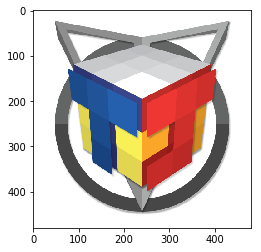

In [2]:
image_filepath = 'cubing.png'

im = Image.open(image_filepath)
pix = im.load()
w,h = im.size
plt.imshow(im)
plt.show()

#### 2.1 Extract pixels as flat array

In [3]:
pixels = []
for i in range(w):
    pixels.append([])
    for j in range(h):
        pixels[i].append(pix[i,j])
pixels = np.array(pixels).astype(np.uint8)
pixels = np.reshape(pixels, [pixels.shape[0] * pixels.shape[1], 3])

### 3. Run KMeans on pixels

In [4]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(pixels)

### 4. Display color categories

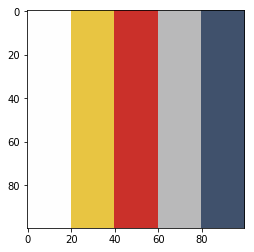

In [5]:
color_categories = kmeans.cluster_centers_.astype(np.uint8)
color_categories = sorted(color_categories, key=lambda rgb: -(rgb[0]*255*255 + rgb[1]*255 + rgb[2]))
palette = []
for color in color_categories:
    palette.append(np.full([100,20,3], color))
palette_pixels = np.hstack(palette)
plt.imshow(palette_pixels)
plt.show()